In [12]:
import matplotlib.pyplot as plt
import numpy as np

# sys.path.append('/Users/mark/git/timml')
# from timml.besselaesnew import besselaesnew
# besselaesnew.initialize()
# from timml.besselaesnumba import besselaesnumba as besselaesnew
import timml.besselnumba as besselaesnew

```
potbeslsho(x, y, z1, z2, lambda, order, ilap, naq)
Input:
  x,y: Point where potential is computed
  z1: Complex begin point of line-sink
  z2: Complex end point of line-sink
  lambda(naq): lambda's (zero for first lambda if Laplace)
  order: Order of the line-sink
  ilap: equals 1 when first value is Laplace line-sink and first lambda equals zero
  naq: Number of aquifers
  rv(naq): Array to store return value (must be pre-allocated)
Output:
  rv(naq): Potentials. Fist spot is Laplace value if ilap=1```

In [ ]:
comp = True
if comp:
    nx, ny = 20, 20
else:
    nx, ny = 100, 100
x, y = np.meshgrid(np.linspace(-10, 10, nx), np.linspace(-10, 10, ny))


def potlstest(order):
    z1 = -2 - 4j
    z2 = 3 + 1j
    lab = np.array([0, 0.4, 4])
    ilap = 1
    naq = 3
    pot = np.empty((naq, ny, nx))
    for i in range(ny):
        for j in range(nx):
            # pot[:, i, j] = besselaesnew.potbeslsho(
            #     x[i, j], y[i, j], z1, z2, lab, order, ilap, naq
            # )
            pot[:, i, j] = besselaesnew.potbeslsv(
                x[i, j], y[i, j], z1, z2, lab, order, ilap, naq
            )[order]
    return pot


def qxqylstest(order):
    z1 = -2 - 4j
    z2 = 3 + 1j
    lab = np.array([0, 0.4, 4])
    ilap = 1
    naq = 3
    qx, qy = np.empty((naq, ny, nx)), np.empty((naq, ny, nx))
    for i in range(ny):
        for j in range(nx):
            # qx[:, i, j], qy[:, i, j] = besselaesnew.disbeslsho(
            #     x[i, j], y[i, j], z1, z2, lab, order, ilap, naq
            # )
            qxqy = besselaesnew.disbeslsv(x[i, j], y[i, j], z1, z2, lab, order, ilap, naq)
            qx[:, i, j] = qxqy[0][order]
            qy[:, i, j] = qxqy[1][order]
    return qx, qy


def potldtest(order):
    z1 = -2 - 4j
    z2 = 3 + 1j
    lab = np.array([0, 0.4, 4])
    ilap = 1
    naq = 3
    pot = np.empty((naq, ny, nx))
    for i in range(ny):
        for j in range(nx):
            pot[:, i, j] = besselaesnew.potbesldho(
                x[i, j], y[i, j], z1, z2, lab, order, ilap, naq
            )
            pot[:, i, j] = besselaesnew.potbesldv(
                x[i, j], y[i, j], z1, z2, lab, order, ilap, naq
            )[order]
    return pot


def qxqyldtest(order):
    z1 = -2 - 4j
    z2 = 3 + 1j
    lab = np.array([0, 0.4, 4])
    ilap = 1
    naq = 3
    qx, qy = np.empty((naq, ny, nx)), np.empty((naq, ny, nx))
    for i in range(ny):
        for j in range(nx):
            # qx[:, i, j], qy[:, i, j] = besselaesnew.disbesldho(
            #     x[i, j], y[i, j], z1, z2, lab, order, ilap, naq
            # )
            qxqy = besselaesnew.disbesldv(x[i, j], y[i, j], z1, z2, lab, order, ilap, naq)
            qx[:, i, j] = qxqy[: order + 1][order]
            qy[:, i, j] = qxqy[1][order:][order]
    return qx, qy

order, aq 0 0 True
order, aq 0 1 False
order, aq 0 2 False
order, aq 1 0 True
order, aq 1 1 False
order, aq 1 2 False
order, aq 2 0 True
order, aq 2 1 False
order, aq 2 2 False


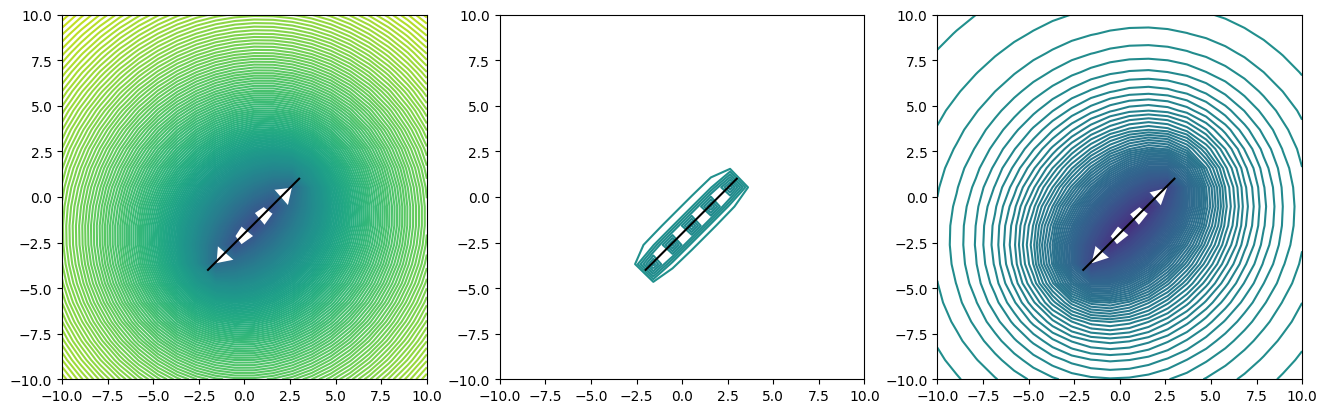

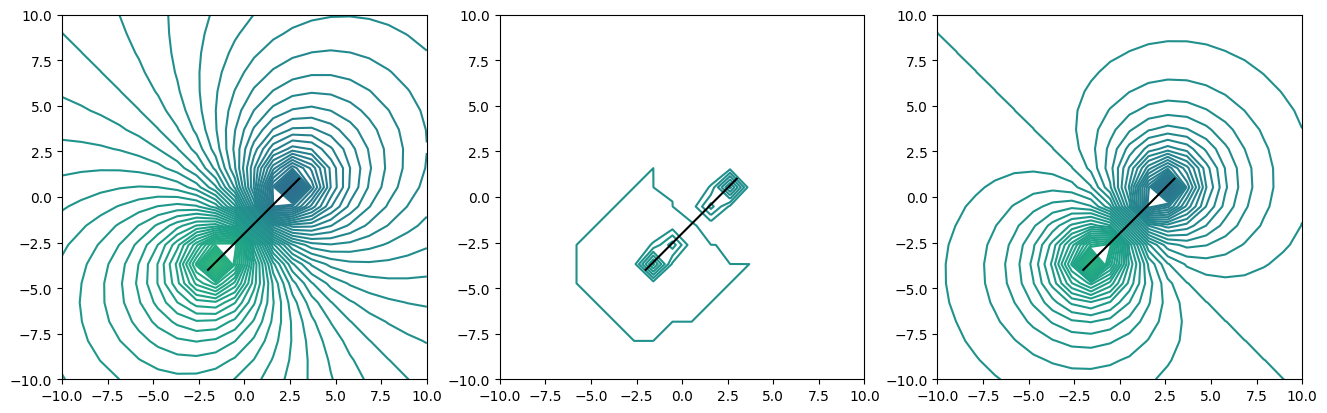

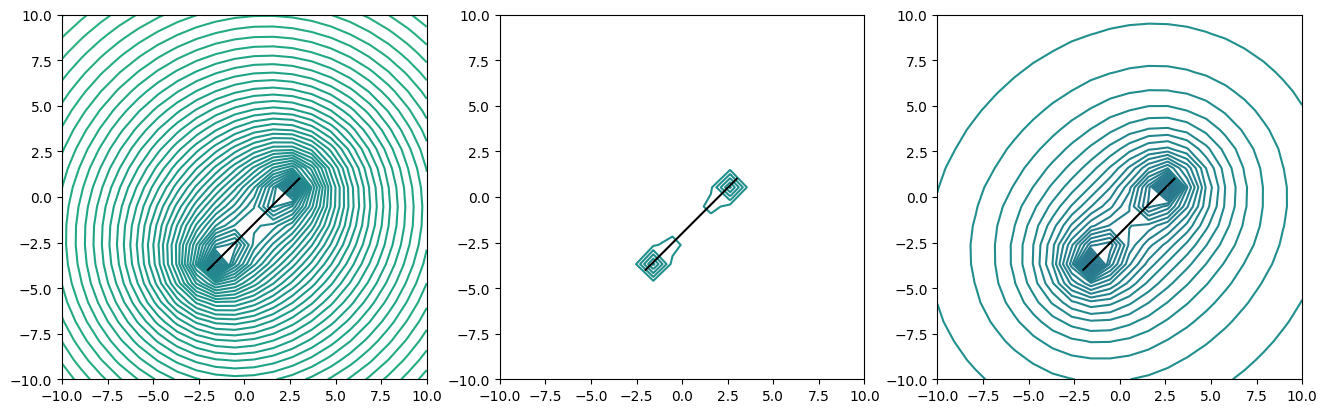

In [14]:
for order in range(3):
    pot = potlstest(order)
    plt.figure(figsize=(16, 8))
    for i in range(3):
        if comp:
            potfor = np.loadtxt(
                "besselaesnew_test_data/potls_order"
                + str(order)
                + "_lab"
                + str(i)
                + ".txt"
            )
            print("order, aq", order, i, np.allclose(pot[i], potfor, atol=1e-10))
        plt.subplot(1, 3, i + 1)
        plt.contour(x, y, pot[i], np.arange(-2, 2, 0.02))
        plt.plot([-2, 3], [-4, 1], "k")
        plt.axis("scaled")

order, aq 0 0 True
order, aq 0 1 False
order, aq 0 2 False
order, aq 1 0 False
order, aq 1 1 False
order, aq 1 2 False
order, aq 2 0 False
order, aq 2 1 False
order, aq 2 2 False


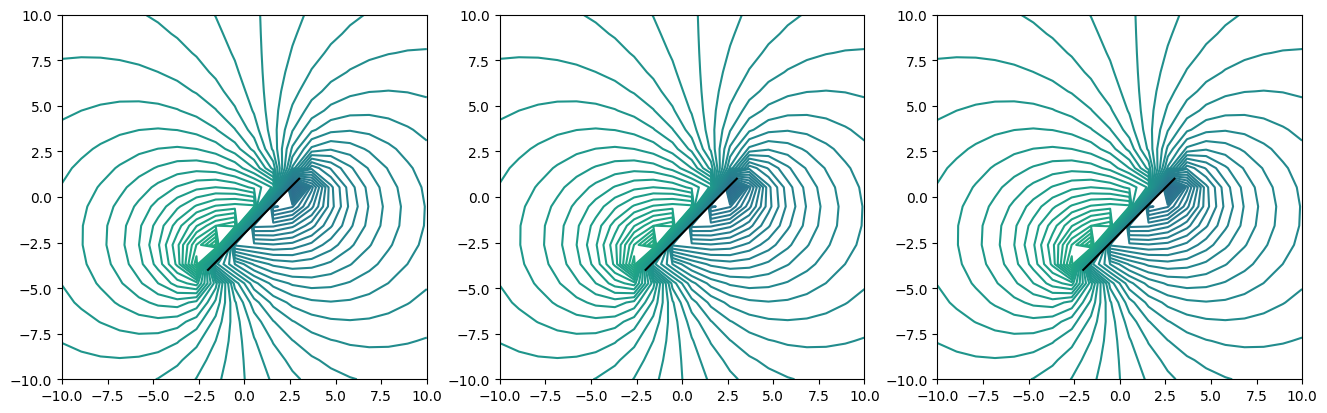

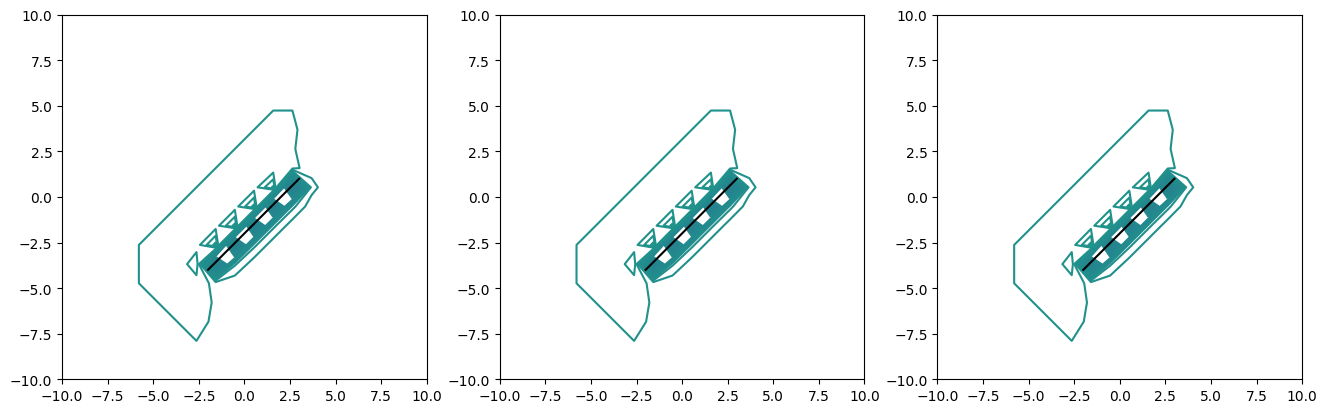

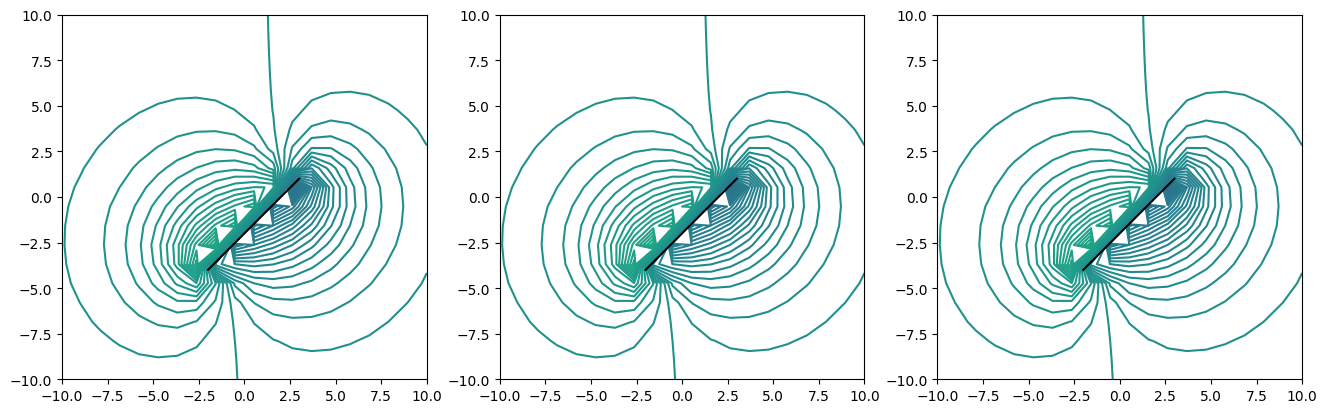

In [15]:
for order in range(3):
    qx, qy = qxqylstest(order)
    plt.figure(figsize=(16, 8))
    for i in range(3):
        if comp:
            qxfor = np.loadtxt(
                "besselaesnew_test_data/qxls_order"
                + str(order)
                + "_lab"
                + str(i)
                + ".txt"
            )
            print("order, aq", order, i, np.allclose(qx[i], qxfor, atol=1e-10))
        plt.subplot(1, 3, i + 1)
        plt.contour(x, y, qx[i], np.arange(-2, 2, 0.02))
        plt.plot([-2, 3], [-4, 1], "k")
        plt.axis("scaled")

order, aq 0 0 True
order, aq 0 1 False
order, aq 0 2 False
order, aq 1 0 False
order, aq 1 1 False
order, aq 1 2 False
order, aq 2 0 False
order, aq 2 1 False
order, aq 2 2 False


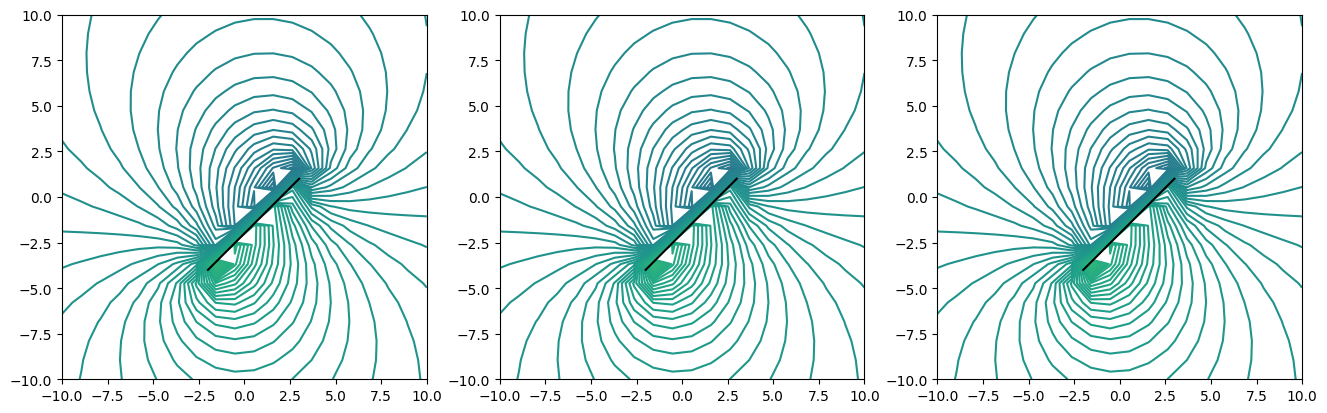

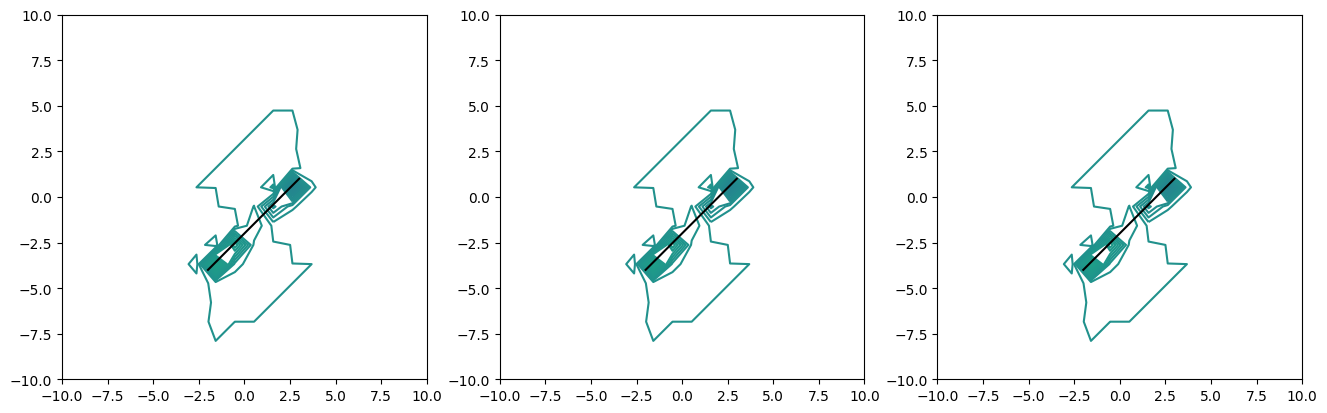

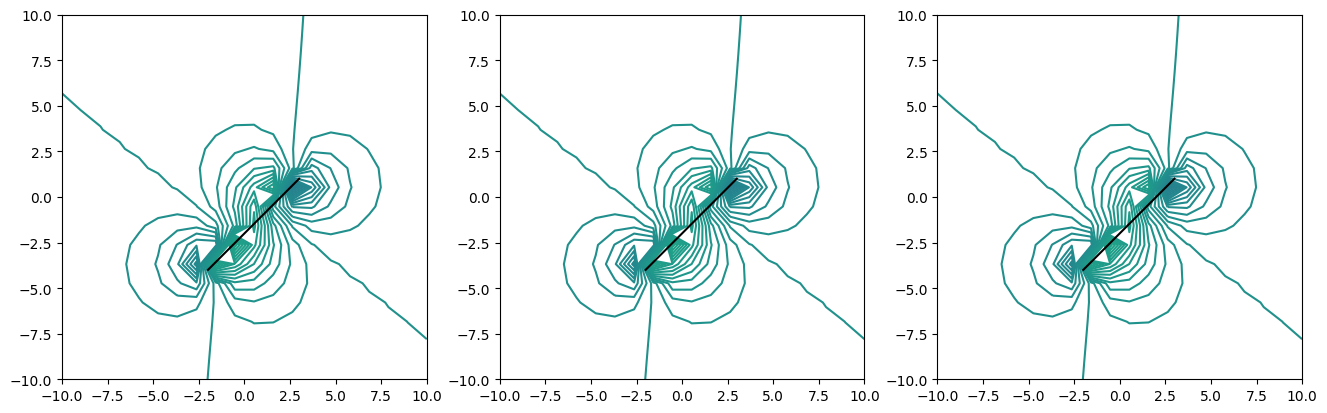

In [16]:
for order in range(3):
    qx, qy = qxqylstest(order)
    plt.figure(figsize=(16, 8))
    for i in range(3):
        if comp:
            qyfor = np.loadtxt(
                "besselaesnew_test_data/qyls_order"
                + str(order)
                + "_lab"
                + str(i)
                + ".txt"
            )
            print("order, aq", order, i, np.allclose(qy[i], qyfor, atol=1e-10))
        plt.subplot(1, 3, i + 1)
        plt.contour(x, y, qy[i], np.arange(-2, 2, 0.02))
        plt.plot([-2, 3], [-4, 1], "k")
        plt.axis("scaled")

In [17]:
for order in range(3):
    pot = potldtest(order)
    plt.figure(figsize=(16, 8))
    for i in range(3):
        if comp:
            potfor = np.loadtxt(
                "besselaesnew_test_data/potld_order"
                + str(order)
                + "_lab"
                + str(i)
                + ".txt"
            )
            print("order, aq", order, i, np.allclose(pot[i], potfor, atol=1e-10))
        plt.subplot(1, 3, i + 1)
        plt.contour(x, y, pot[i], np.arange(-2, 2, 0.02))
        plt.plot([-2, 3], [-4, 1], "k")
        plt.axis("scaled")

AttributeError: module 'timml.besselnumba' has no attribute 'potbesldho'

order, aq 0 0 True
order, aq 0 1 True
order, aq 0 2 True
order, aq 1 0 True
order, aq 1 1 True
order, aq 1 2 True
order, aq 2 0 True
order, aq 2 1 True
order, aq 2 2 True


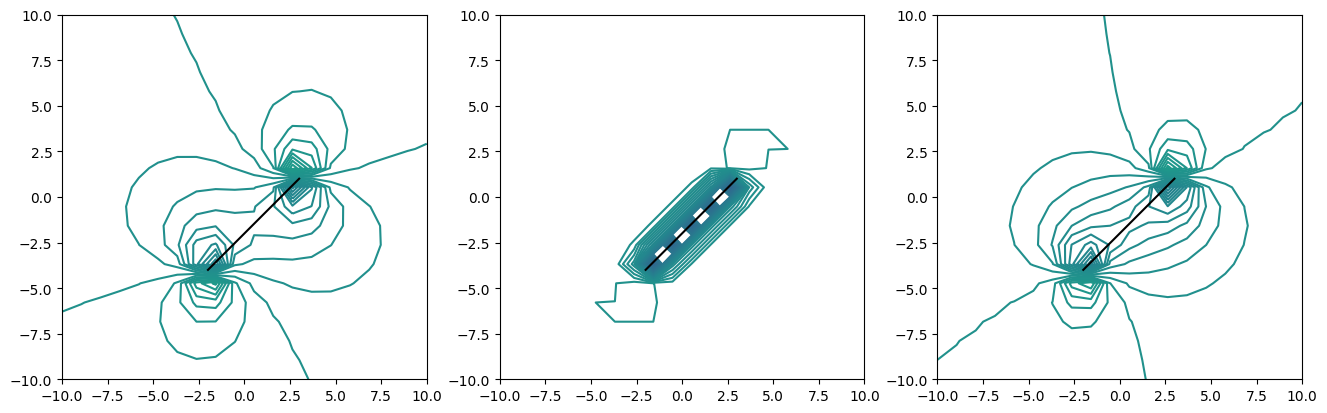

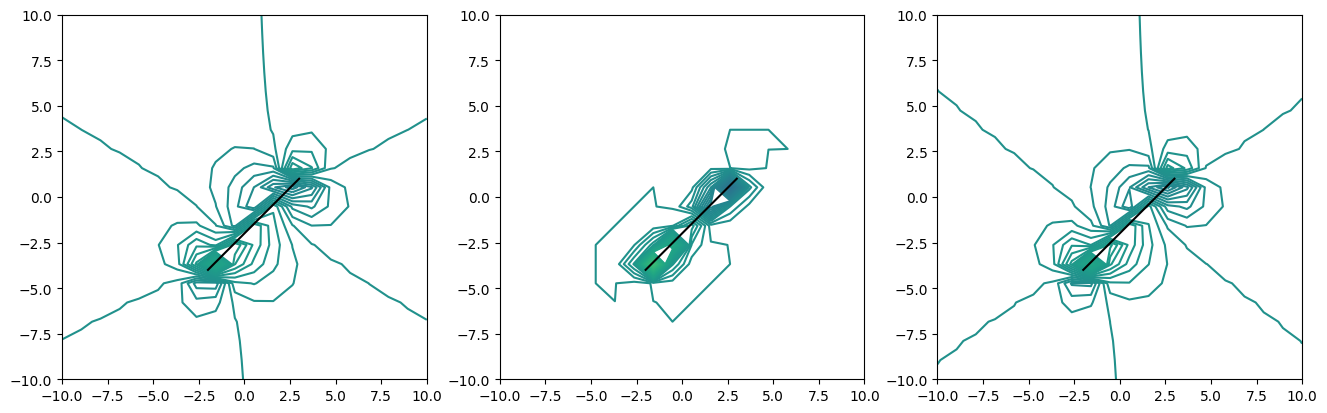

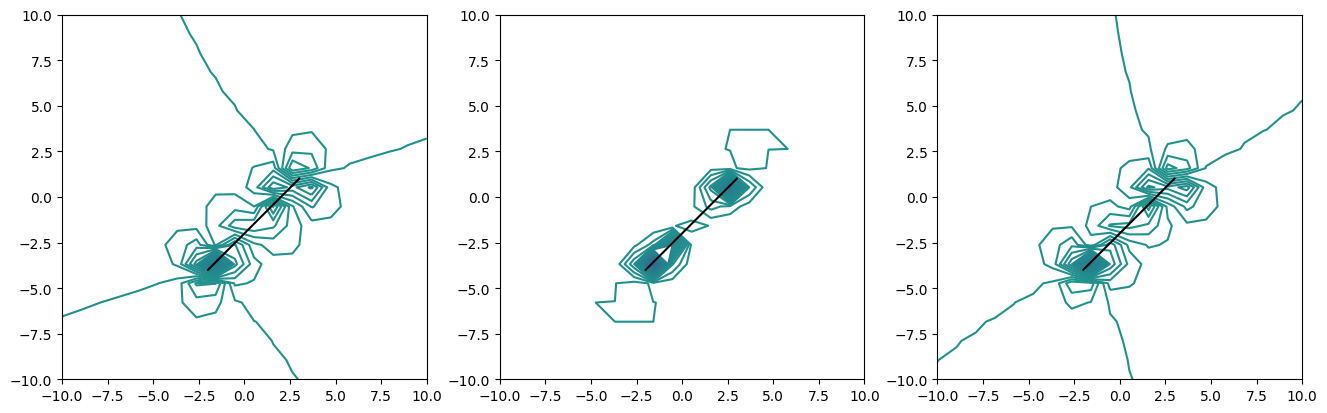

In [ ]:
for order in range(3):
    qx, qy = qxqyldtest(order)
    plt.figure(figsize=(16, 8))
    for i in range(3):
        if comp:
            qxfor = np.loadtxt(
                "besselaesnew_test_data/qxld_order"
                + str(order)
                + "_lab"
                + str(i)
                + ".txt"
            )
            print("order, aq", order, i, np.allclose(qx[i], qxfor, atol=1e-10))
        plt.subplot(1, 3, i + 1)
        plt.contour(x, y, qx[i], np.arange(-2, 2, 0.02))
        plt.plot([-2, 3], [-4, 1], "k")
        plt.axis("scaled")

order, aq 0 0 True
order, aq 0 1 True
order, aq 0 2 True
order, aq 1 0 True
order, aq 1 1 True
order, aq 1 2 True
order, aq 2 0 True
order, aq 2 1 True
order, aq 2 2 True


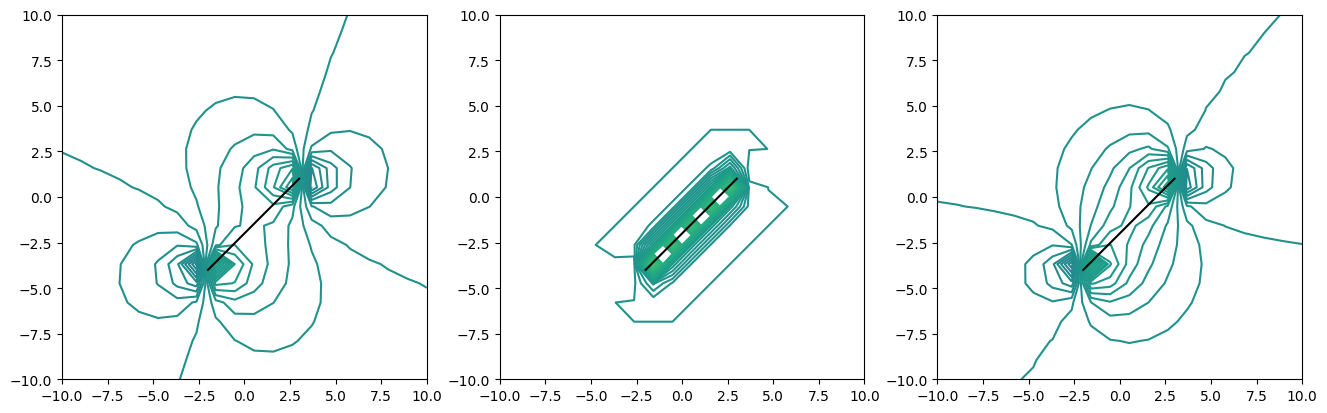

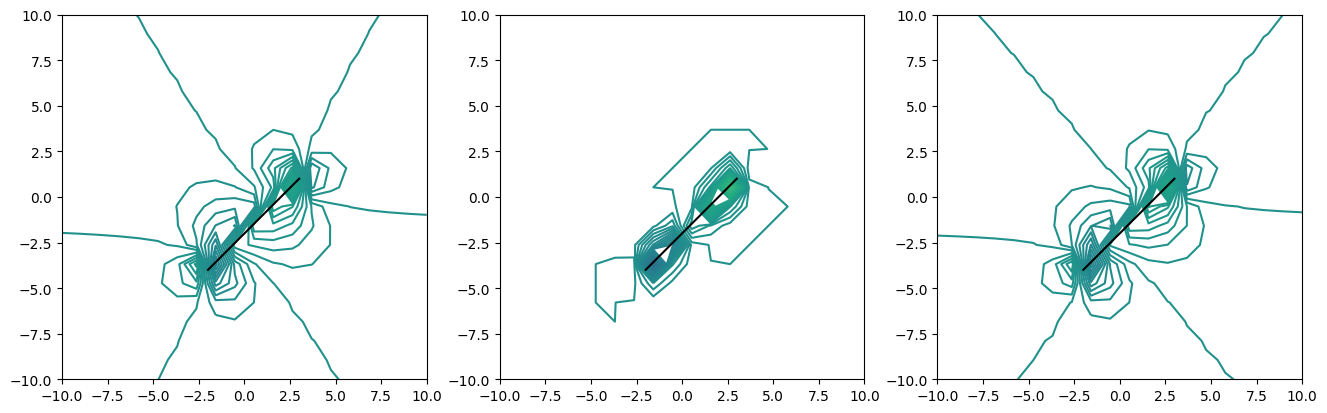

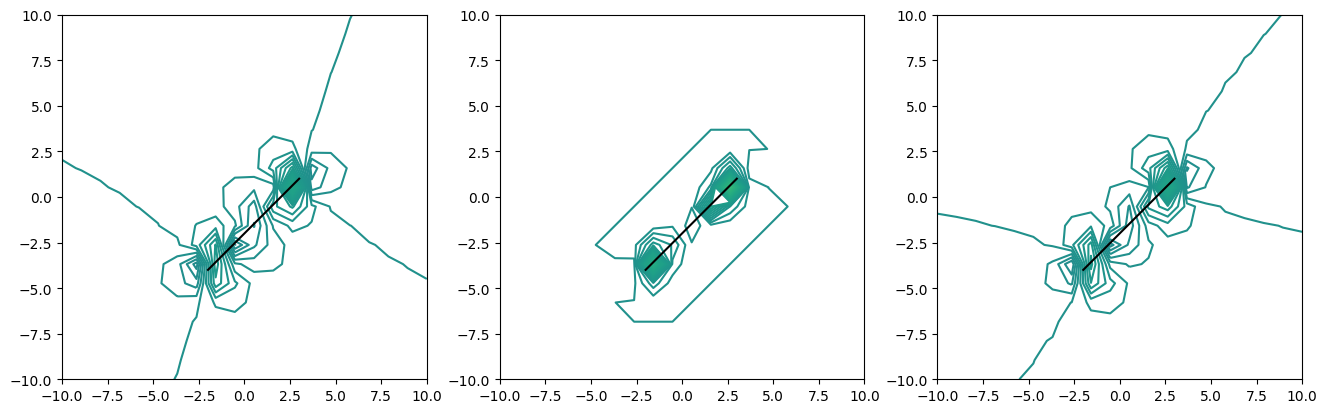

In [ ]:
for order in range(3):
    qx, qy = qxqyldtest(order)
    plt.figure(figsize=(16, 8))
    for i in range(3):
        if comp:
            qyfor = np.loadtxt(
                "besselaesnew_test_data/qyld_order"
                + str(order)
                + "_lab"
                + str(i)
                + ".txt"
            )
            print("order, aq", order, i, np.allclose(qy[i], qyfor, atol=1e-10))
        plt.subplot(1, 3, i + 1)
        plt.contour(x, y, qy[i], np.arange(-2, 2, 0.02))
        plt.plot([-2, 3], [-4, 1], "k")
        plt.axis("scaled")

In [ ]:
# def compute_data():
#     for order in range(3):
#         pot = potlstest(order)
#         for i in range(3):
#             np.savetxt(
#                 "besselaesnew_test_data/potls_order"
#                 + str(order)
#                 + "_lab"
#                 + str(i)
#                 + ".txt",
#                 pot[i],
#             )
#     for order in range(3):
#         qx, qy = qxqylstest(order)
#         for i in range(3):
#             np.savetxt(
#                 "besselaesnew_test_data/qxls_order"
#                 + str(order)
#                 + "_lab"
#                 + str(i)
#                 + ".txt",
#                 qx[i],
#             )
#             np.savetxt(
#                 "besselaesnew_test_data/qyls_order"
#                 + str(order)
#                 + "_lab"
#                 + str(i)
#                 + ".txt",
#                 qy[i],
#             )
#     for order in range(3):
#         pot = potldtest(order)
#         for i in range(3):
#             np.savetxt(
#                 "besselaesnew_test_data/potld_order"
#                 + str(order)
#                 + "_lab"
#                 + str(i)
#                 + ".txt",
#                 pot[i],
#             )
#     for order in range(3):
#         qx, qy = qxqyldtest(order)
#         for i in range(3):
#             np.savetxt(
#                 "besselaesnew_test_data/qxld_order"
#                 + str(order)
#                 + "_lab"
#                 + str(i)
#                 + ".txt",
#                 qx[i],
#             )
#             np.savetxt(
#                 "besselaesnew_test_data/qyld_order"
#                 + str(order)
#                 + "_lab"
#                 + str(i)
#                 + ".txt",
#                 qy[i],
#             )


# compute_data()